# Deep Learning and Convolutional Neural Networks (CNNs)

#### 1) Download the Cifar10 dataset.

2024-12-09 09:44:15.379917: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


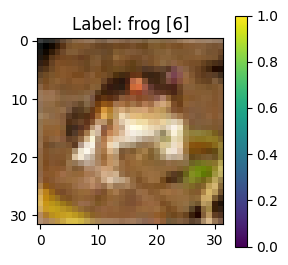

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import seaborn as sns

seed = 123 # to ensure we always get the same results
np.random.seed(seed) # to ensure we always get the same results
tf.keras.utils.set_random_seed(seed) # to ensure we always get the same results

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_labels = np.array(train_labels).transpose()[0] # convert from a column to row
test_labels = np.array(test_labels).transpose()[0] # convert from a column to row

#normalisation
train_images, test_images = train_images / 255.0, test_images / 255.0 # all values between 0 and 1 to improve performance

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(3, 3))
plt.imshow(train_images[0])
plt.title(("Label: " + str(class_names[train_labels[0]])) + " [" + str(train_labels[0]) +"]")
plt.colorbar()
plt.grid(False)
plt.show()

#### 2) Images in the training and validation sets:

In [2]:
print('Number of images in training: ' + str(len(train_images)))
print('Number of images in testing: ' + str(len(test_images)))

Number of images in training: 50000
Number of images in testing: 10000


#### 3) Images for each class in the training set:

In [3]:
for i in range(len(class_names)):
    print(class_names[i] + ': ' + str(np.count_nonzero(train_labels == i)))

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


#### 4) Display some images from the training dataset
Images provided have a small resolution to make the training faster.

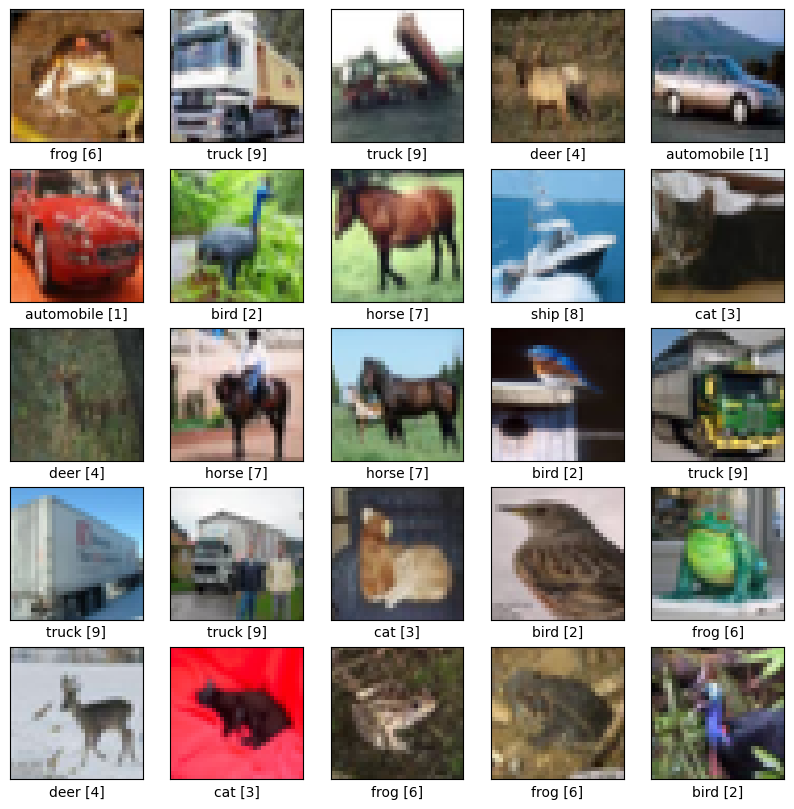

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(class_names[train_labels[i]]) + " [" + str(train_labels[i]) +"]")

plt.show()

#### 5) We create a simple neural network with 3 convolutional layers, with max pooling and average pooling, and 1 dense layer:

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # Convolutional layer 3x3 with a ReLu activation
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), # Max pooling 2x2
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), # Convolutional layer 3x3 with a ReLu activation
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), # Max pooling 2x2
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'), # Convolutional layer 3x3 with a ReLu activation
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2), # Average pooling 2x2
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10) # number of outputs = 10 (10 classess)
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 6) We compile the model. We use Adam optimiser, and a loss function SparseCategoricalCrossentropy (because it is a classification task):

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 2, 2, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,154 (102.16 KB)

 Trainable params: 26,154 (102.16 KB)

 Non-trainable params: 0 (0.00 B)

#### 7) Train the model

In [7]:
epochs = 15
history = model.fit(train_images, train_labels, validation_data=[test_images, test_labels], epochs=epochs)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3455 - loss: 1.7936 - val_accuracy: 0.5102 - val_loss: 1.3589
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5252 - loss: 1.3286 - val_accuracy: 0.5704 - val_loss: 1.2049
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5822 - loss: 1.1906 - val_accuracy: 0.6071 - val_loss: 1.1189
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6151 - loss: 1.1045 - val_accuracy: 0.6297 - val_loss: 1.0588
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6411 - loss: 1.0424 - val_accuracy: 0.6469 - val_loss: 1.0182
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6579 - loss: 0.9924 - val_accuracy: 0.6576 - val_loss: 0.9827
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6725 - loss: 0.9502 - val_accuracy: 0.6712 - val_loss: 0.9540
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6857 -

#### 8) Evaluate the model

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.7005 - loss: 0.8817

Test accuracy: 0.7005000114440918


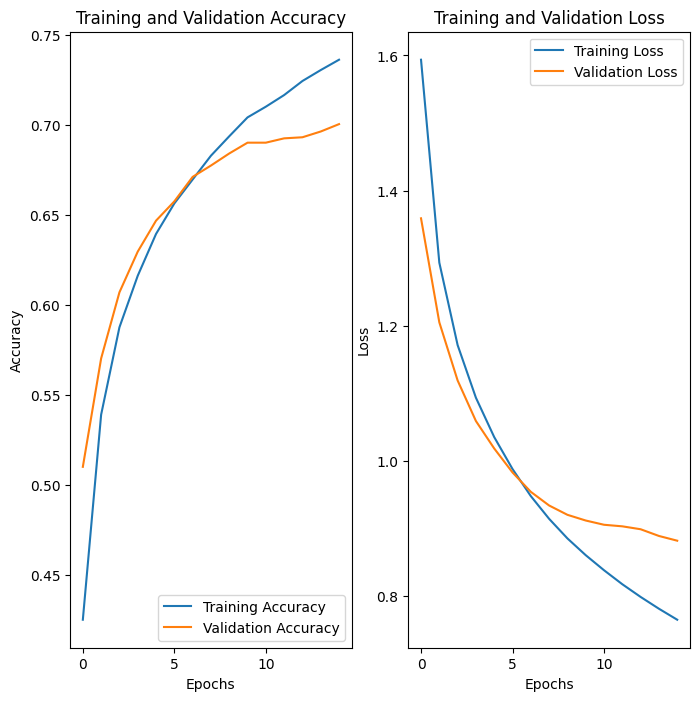

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### 9) Get probabilities. For each test image will tell us the probability to belong to each of the 10 classes (i.e., for each test image will output an array of 10 values).

In [10]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
probabilities = probability_model.predict(test_images)
print('Size of variable probabilities: ' + str(probabilities.shape)) # You can see the size of the arrays here (10000, 10)
print('Probabilities:')
print(probabilities) # Returns an array of 10000 arrays with 10 probabilities each (one for each class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Size of variable probabilities: (10000, 10)
Probabilities:
[[6.7159468e-03 2.4965027e-04 2.2187009e-02 ... 1.9034976e-03
  1.9173995e-02 6.6162628e-04]
 [5.2002866e-02 2.2743994e-01 3.0866660e-05 ... 4.4505887e-05
  7.0035559e-01 2.0102317e-02]
 [1.6636798e-01 2.7062169e-01 5.6093344e-03 ... 2.1467708e-02
  3.4418488e-01 1.3273717e-01]
 ...
 [3.2666136e-05 4.8635275e-07 1.0462472e-01 ... 1.0762564e-02
  2.9193319e-05 1.6021680e-06]
 [2.3842052e-02 8.3613256e-03 5.5132303e-03 ... 6.8616144e-02
  6.1555434e-04 3.1136610e-03]
 [1.4393561e-05 6.8077672e-05 7.1692985e-04 ... 9.5646137e-01
  6.8532808e-07 8.9357763e-06]]


#### 10) Get predicted class
For each image, we have a vector of 10 probabilities (1 for each possible class) that tells us the probability that that image belongs to the class. We now want to get the class with the highest probability. We use argmax to get the class with the highest probability

In [11]:
predictions = np.argmax(probabilities, axis = 1) # gets the maximum probability of each image (maximum value)

print('Size of variable predictions: ' + str(predictions.shape)) # We now have one value (class) for each image.
print('Predictions:')
print(predictions)
print('Labels:')
print(test_labels)

Size of variable predictions: (10000,)
Predictions:
[3 8 8 ... 5 5 7]
Labels:
[3 8 8 ... 5 1 7]


#### 11) Show the confusion matrix
The confusion matrix is a matrix that shows for each class (labels) how many images where predicted in the correct or wrong class. The diagonal of the matrix shows the classes that where predicted correctly, the rest are errors. They are useful to know the classes in which the network gets 'confused'. Label is the original (true) label, so the correct class. Prediction is the predicted class by the network (which may be correct or incorrect).

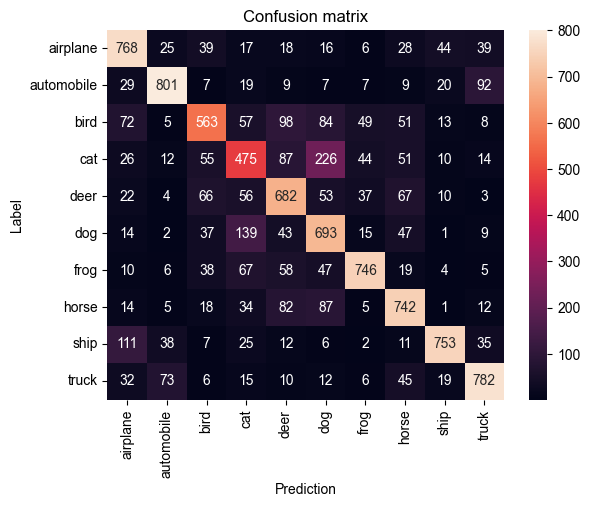

In [12]:
def plot_confusion_matrix(actual, predicted, labels):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(7, 7)})
  ax.set_title('Confusion matrix')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Label')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

plot_confusion_matrix(test_labels, predictions, class_names)